<a href="https://colab.research.google.com/github/codewithsrs/app-data-analysis/blob/main/playstore_app_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We imported the necessary libraries that can be needed for our EDA.

**Lets read the file as play_df and reviews_df for play_store data and user_reviews data**

In [79]:
play_df = pd.read_csv("/content/drive/MyDrive/Copy of Play Store Data.csv")
reviews_df = pd.read_csv("/content/drive/MyDrive/Copy of User Reviews.csv")

In [108]:
play_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [107]:
reviews_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


In [82]:
#lets drop nan values from reviews dataframe which have no reviews
reviews_df.drop(reviews_df[reviews_df['Translated_Review'].isna()].index,inplace=True)
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [112]:
#Lets merge two dataframes
combined_df = pd.merge(play_df,reviews_df,how='inner',left_on='App',right_on='App')
combined_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


In [106]:
combined_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [84]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72605 entries, 0 to 72604
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72605 non-null  object 
 1   Category                72605 non-null  object 
 2   Rating                  72566 non-null  float64
 3   Reviews                 72605 non-null  object 
 4   Size                    72605 non-null  object 
 5   Installs                72605 non-null  object 
 6   Type                    72605 non-null  object 
 7   Price                   72605 non-null  object 
 8   Content Rating          72605 non-null  object 
 9   Genres                  72605 non-null  object 
 10  Last Updated            72605 non-null  object 
 11  Current Ver             72605 non-null  object 
 12  Android Ver             72605 non-null  object 
 13  Translated_Review       72605 non-null  object 
 14  Sentiment               72605 non-null

In [85]:
combined_df.drop(play_df[play_df['Category']=='1.9'].index,inplace = True)

**Data Preprocessing**

In [117]:
combined_df['Size'] = combined_df['Size'].str.rstrip('M')
combined_df['Installs'] = combined_df['Installs'].str.rstrip('+')
combined_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [110]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72604 entries, 0 to 72603
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72604 non-null  object 
 1   Category                72604 non-null  object 
 2   Rating                  72565 non-null  float64
 3   Reviews                 72604 non-null  object 
 4   Size                    72604 non-null  object 
 5   Installs                72604 non-null  object 
 6   Type                    72604 non-null  object 
 7   Price                   72604 non-null  object 
 8   Content Rating          72604 non-null  object 
 9   Genres                  72604 non-null  object 
 10  Last Updated            72604 non-null  object 
 11  Current Ver             72604 non-null  object 
 12  Android Ver             72604 non-null  object 
 13  Translated_Review       72604 non-null  object 
 14  Sentiment               72604 non-null

**We have the question to find out the average rating of the paid apps and free apps and compare them**

In [86]:
combined_df.groupby('Type')['Rating'].mean()

Type
Free    4.333639
Paid    4.333376
Name: Rating, dtype: float64

We saw the result that the average rating of free and paid apps are very close and yet the average rating of paid apps is more . So we can say paid apps are performing well

**Now lets check the number of paid apps and number of free apps to total apps**

In [87]:
#we have one index missing from the dataframe so lets reset and drop the old index column
combined_df.reset_index(inplace=True)
combined_df.drop(['index'],inplace = True,axis = 1)

<BarContainer object of 3 artists>

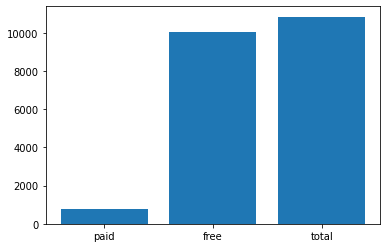

In [88]:
paid_list=[]
free_list = []
total_list = [i for i in play_df['App']]
for i in range(len(play_df['Type'])):
  if play_df['Type'][i]=='Paid':
    paid_list.append(play_df['App'][i])
  if play_df['Type'][i]=='Free':
    free_list.append(play_df['App'][i])
  else:
    continue

p = len(paid_list)
q = len(free_list)
r = len(total_list)
    
name = ('paid','free','total')
values = (p,q,r)
plt.bar(name,values)

**Sentiment polarity is the inclination of positivity or negativity so lets see whats the average sentiment polarity per category**

In [89]:
combined_df.groupby('Category')['Sentiment_Polarity'].mean()

Category
ART_AND_DESIGN         0.234735
AUTO_AND_VEHICLES      0.348683
BEAUTY                 0.193360
BOOKS_AND_REFERENCE    0.226526
BUSINESS               0.247749
COMICS                 0.468482
COMMUNICATION          0.182965
DATING                 0.164817
EDUCATION              0.251392
ENTERTAINMENT          0.133400
EVENTS                 0.377933
FAMILY                 0.136996
FINANCE                0.169447
FOOD_AND_DRINK         0.253251
GAME                   0.060506
HEALTH_AND_FITNESS     0.278884
HOUSE_AND_HOME         0.237435
LIBRARIES_AND_DEMO     0.240771
LIFESTYLE              0.187299
MAPS_AND_NAVIGATION    0.267218
MEDICAL                0.226565
NEWS_AND_MAGAZINES     0.106667
PARENTING              0.318880
PERSONALIZATION        0.252074
PHOTOGRAPHY            0.220280
PRODUCTIVITY           0.169384
SHOPPING               0.181029
SOCIAL                 0.101338
SPORTS                 0.172202
TOOLS                  0.209034
TRAVEL_AND_LOCAL       0.168372

So we can see here highest positivity is for comics and lowest positivity is for games. So may be comics apps are more enjoyble than the Games 

**May be we can get it better by plotting a simple line chart**

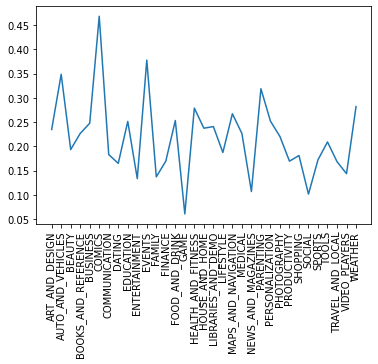

In [90]:
x = sorted([i for i in combined_df['Category'].unique()])
y = [i for i in combined_df.groupby('Category')['Sentiment_Polarity'].mean()]
plt.xticks(rotation = 90)
plt.plot(x,y)

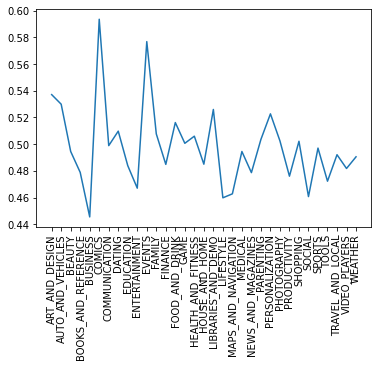

In [91]:
z = [i for i in combined_df.groupby('Category')['Sentiment_Subjectivity'].mean()]
x = sorted([i for i in combined_df['Category'].unique()])
plt.xticks(rotation = 90)
plt.plot(x,z)

So from the above we can see that comics and events categories have more subjectivity than the game category that means comics and events categories have more opinion based reviews than games.

**Now lets find out the Average setiment polarity per app**

In [92]:
cleaned_df = combined_df[['App','Sentiment_Polarity']].dropna()
cleaned_df

,App,Sentiment_Polarity
0,Coloring book moana,-0.250000
1,Coloring book moana,-0.725000
2,Coloring book moana,0.000000
3,Coloring book moana,0.500000
4,Coloring book moana,-0.800000
...,...,...
72599,A+ Gallery - Photos & Videos,0.475000
72600,A+ Gallery - Photos & Videos,0.566667
72601,A+ Gallery - Photos & Videos,0.200000
72602,A+ Gallery - Photos & Videos,0.000000


In [93]:
cleaned_df.groupby('App').agg({'Sentiment_Polarity':'mean'})

,Sentiment_Polarity
App,
10 Best Foods for You,0.470733
11st,0.185943
1800 Contacts - Lens Store,0.318145
1LINE – One Line with One Touch,0.196290
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.449566
...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.101622
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765
Hotstar,0.038178


**Sentiment polarity indicates how much a review is inclined to positivity or negativity and sentiment subjectivity indicates how much factual or emotional that review is. So lets see if there is any co relation between two**

In [94]:
sentiment_df = combined_df[['Sentiment_Polarity','Sentiment_Subjectivity']].dropna()
sentiment_df

,Sentiment_Polarity,Sentiment_Subjectivity
0,-0.250000,1.000000
1,-0.725000,0.833333
2,0.000000,0.000000
3,0.500000,0.600000
4,-0.800000,0.900000
...,...,...
72599,0.475000,0.512500
72600,0.566667,0.733333
72601,0.200000,0.200000
72602,0.000000,0.000000


In [95]:
sentiment_df.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.227487
Sentiment_Subjectivity,0.227487,1.000000


As we can see here we have a positive co-relation but not very much so we cant say what can be the sentiment subjectivity by looking at the sentiment polarity alone.

**Lets create box plots for two sentiment polarity and sentiment subjectivity to know where most of the values lie**

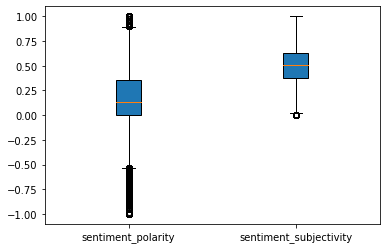

In [96]:
x = [i for i in sentiment_df['Sentiment_Polarity']]
y = [i for i in sentiment_df['Sentiment_Subjectivity']]
plt.boxplot((x,y),patch_artist=True,labels = ['sentiment_polarity','sentiment_subjectivity'])
plt.show()

**Lets see which category have how much positiveness and negativeness by comparing the sentiment with the category**

In [97]:
#first lets make a dataframe by cleaning the na values in sentiment column from combined_df
sentiment_category_df = combined_df[['Category','Sentiment']].dropna()
sentiment_category_df

,Category,Sentiment
0,ART_AND_DESIGN,Negative
1,ART_AND_DESIGN,Negative
2,ART_AND_DESIGN,Neutral
3,ART_AND_DESIGN,Positive
4,ART_AND_DESIGN,Negative
...,...,...
72599,PHOTOGRAPHY,Positive
72600,PHOTOGRAPHY,Positive
72601,PHOTOGRAPHY,Positive
72602,PHOTOGRAPHY,Neutral


In [98]:
#lets create a completely new dataframe by grouping the category and sentiment
new_df = sentiment_category_df.groupby(['Sentiment','Category']).size().to_frame(name = 'count').reset_index()
new_df

,Sentiment,Category,count
0,Negative,ART_AND_DESIGN,61
1,Negative,AUTO_AND_VEHICLES,17
2,Negative,BEAUTY,65
3,Negative,BOOKS_AND_REFERENCE,134
4,Negative,BUSINESS,342
...,...,...,...
94,Positive,SPORTS,2201
95,Positive,TOOLS,1090
96,Positive,TRAVEL_AND_LOCAL,1824
97,Positive,VIDEO_PLAYERS,190


In [99]:
#now lets make a pivot to see which category has how much positive,negative and neutral reviews
pivotted_new_df = new_df.pivot(index='Category',columns='Sentiment',values='count')
pivotted_new_df

Sentiment,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,61,62,259
AUTO_AND_VEHICLES,17,36,236
BEAUTY,65,88,185
BOOKS_AND_REFERENCE,134,130,551
BUSINESS,342,555,1450
COMICS,2,6,72
COMMUNICATION,372,285,1292
DATING,697,530,1971
EDUCATION,216,132,1346


In [100]:
#lets find out most negative reviewed category
pivotted_new_df[pivotted_new_df['Negative']==pivotted_new_df['Negative'].max()]

Sentiment,Negative,Neutral,Positive
Category,,,
GAME,7270,814,11041


In [101]:
#lets find out most positive reviewed category
pivotted_new_df[pivotted_new_df['Positive']==pivotted_new_df['Positive'].max()]

Sentiment,Negative,Neutral,Positive
Category,,,
GAME,7270,814,11041


In [102]:
#lets find minimum number of negative reviewed Category
pivotted_new_df[pivotted_new_df['Negative']==pivotted_new_df['Negative'].min()]

Sentiment,Negative,Neutral,Positive
Category,,,
COMICS,2,6,72


In [103]:
#lets find minimum number of positive reviewed Category
pivotted_new_df[pivotted_new_df['Positive']==pivotted_new_df['Positive'].min()]

Sentiment,Negative,Neutral,Positive
Category,,,
COMICS,2,6,72


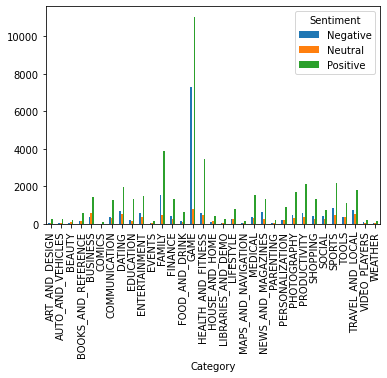

In [104]:
#lets plot the pivot
pivotted_new_df.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

**Lets see which category is popular among the teens**

In [105]:
combined_df[combined_df['Content Rating']=='Teen'].groupby('Category')['Installs'].mean()

DataError: ignored